In [16]:
%matplotlib notebook
# SVM for classifying fetch olivetti faces
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces as faces

In [17]:
faces = faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [18]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

dict_keys(['DESCR', 'data', 'target', 'images'])
(400, 64, 64)
(400, 4096)
(400,)


In [27]:
# print faces
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize = (12,12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1,
                       hspace = .05, wspace = .05)
    for i in range(top_n):
        #plot the images in a matrix of 20 * 20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap = plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    

<IPython.core.display.Javascript object>


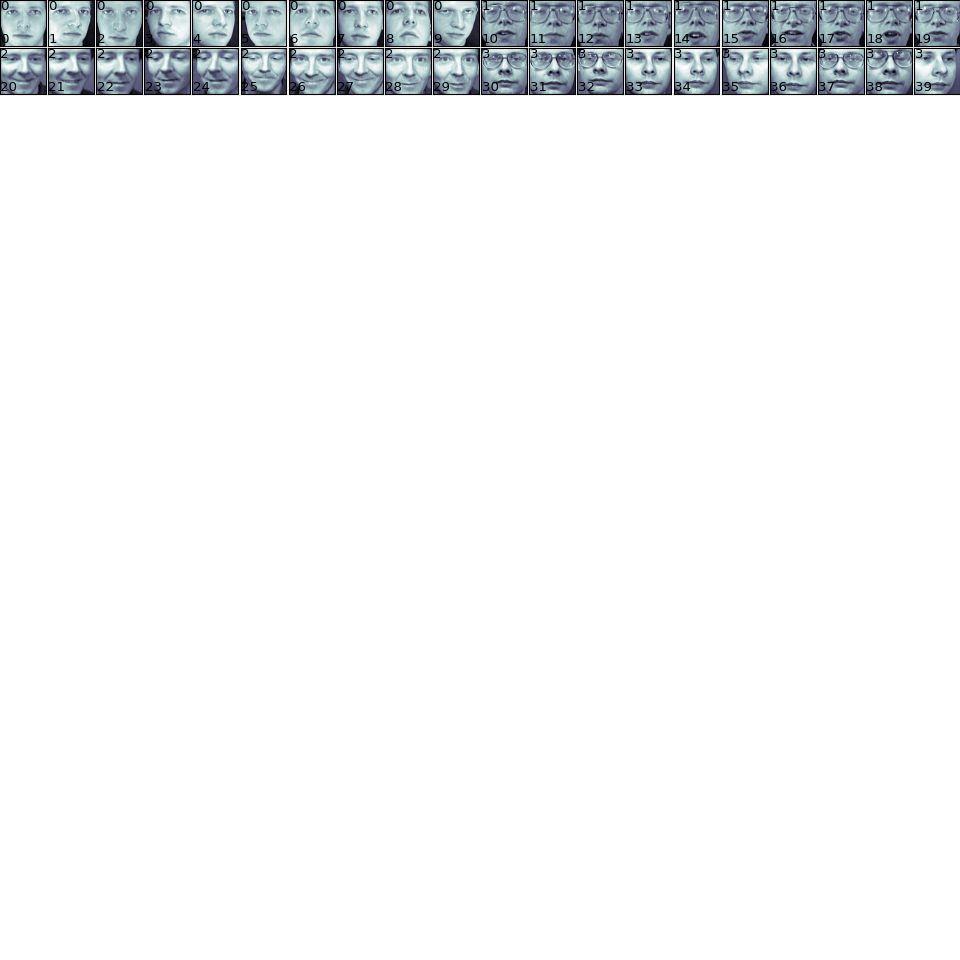

In [28]:
print_faces(faces.images, faces.target, 40)

In [22]:
print(faces.images[1])

[[ 0.45454547  0.47107437  0.51239669 ...,  0.19008264  0.18595041
   0.18595041]
 [ 0.44628099  0.48347107  0.52066118 ...,  0.21487603  0.2107438
   0.2107438 ]
 [ 0.49586776  0.5165289   0.53305787 ...,  0.20247933  0.20661157
   0.20661157]
 ..., 
 [ 0.77272725  0.78099173  0.79338843 ...,  0.14462809  0.14462809
   0.14462809]
 [ 0.77272725  0.77685952  0.78925622 ...,  0.13636364  0.13636364
   0.13636364]
 [ 0.76446283  0.78925622  0.78099173 ...,  0.15289256  0.15289256
   0.15289256]]


In [29]:
# Use SVM recognize faces
from sklearn.svm import SVC

In [30]:
svc_1 = SVC(kernel = 'linear')

In [31]:
from sklearn.cross_validation import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                   faces.target, test_size = 0.25,
                                                   random_state=0)

In [35]:
# K-fold cross-validation
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

In [37]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle = True, random_state =0)
    #by default the score used is the one returned by score method of the 
    #method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv = cv)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(
    np.mean(scores), sem(scores)))

In [39]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


In [41]:
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print("Accuracy on test set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred)) 
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [42]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on test set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19       